# Interpolation

## 07.01 Interpolation

Given input data such as:
$$
(t_1, y_1), (t_2, y_2), \cdots, (t_m, y_m) \quad t_1 < t_2 < \cdots < t_m
$$

determine a function $f : \mathbb{R} \rightarrow \mathbb{R}$ such that:
$$
f(t_i) = y_i \quad i = 1, \cdots, m
$$

$f$ is referred to as **interpolating function**

Additional constraints might be imposed:
* smoothness
* monotonicity
* convexity

Use cases:
* graaphics or plotting
* differentiating or integrating 
* replacing complex function with simpler one

#### Interpolation vs. Approximation
Interpolation fits given input data points **exactly** whereas approximation does not.

Example of approximation: Smooth noisy data using least squares.

#### Basis Functions
Family of functions for interpolating data points spanned by a set of basis functions $\phi_1(t), \cdots, \phi_n(t)$.

Interpolating function $f$ is linear combination of basis functions:
$$
f(t_i) = \sum_{j=1}^{n} x_j \phi_j (t_i) = y_i
$$
where
* $x$ is an n-vector of parameters
* $\phi_j (t_i)$ is the value of *jth* basis function at $t_i$ forms an $m \times n$ matrix $A$
* $y$ is the product of the linear system $Ax$

#### Existence, Uniqueness, and Conditioning
Existence depends on the number of data points $m$ and basis functions $n$.
* If $m > n$, then interpolant doesn't exist.
* If $m < n$, then interpolant is not unique.
* If $m = n$, then basis matrix $A$ is nonsingular and data can be fit exactly.

Sensitivity of $x$ depends on $\text{cond}(A)$ which depends on basis functions.

## 07.02 Polynomial Interpolation

Unique polynomial of degree $n-1$ passsing through $n$ distinct data points.

#### Monomial Basis
Basis functions given by sequential powers:
$$
\phi_j (t) = t^{j-1} \quad j=1, \cdots, n
$$

Polynomial evaluated at $t_i$ with this basis:
$$
p_{n-1} (t_i) = x_1 + x_2 t_i + x_3 t_i^2 + \cdots + x_n t_i^{n-1}
$$

The $n \times n$ matrix is known as **Vandermonde matrix**:
$$
Ax = \begin{bmatrix}
1 & t_1 & t_1^2 & \cdots & t_1^{n-1} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & t_n & t_n^2 & \cdots & t_n^{n-1} \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix}
$$

For monomial basis, matrix $\text{cond}(A)$ increases with degree of polynomial.
* Ill-conditioning does not prevent us from fitting points.
* Residuals at fitted data points is zero.
* Coefficients will be poorly determined.
* Relatively high cost to solve linear system $O(n^3)$.
* Scaling can help reduce the growth in condition number.

#### Horner's Rule
Rather than explicitly compute powers, performed nested multiplications of $n$ additions and $n$ multiplications.
$$
p_{n-1} (t_i) = x_1 + t_i (x_2 + t_i (x_3 + t_i (\cdots + (x_{n-1} + tx_n) \cdots)))
$$

Determine the polynomial of degree 2 used to interpolate 3 ($m=3$) data points.

In [1]:
import numpy as np

# Input data $(t_i, y_i)$.
m = 3
t = np.array([-2,0,1], dtype='d')
y = np.array([-27,-1,0], dtype='d')

# Solve Ax = y for x.
A = np.column_stack((np.ones(m), t, t*t))
x = np.linalg.solve(A, y)
print("x: ", x)

# Evaluate the polynomial at the data points.
vft = np.vectorize(lambda t: x[0] + t*(x[1] + x[2]*t))  # Horner's rule.
yhat = vft(t)
np.testing.assert_almost_equal(y - yhat, np.zeros(m))

x:  [-1.  5. -4.]


Plot the observations against the fit.

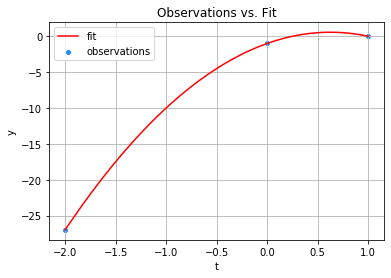

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

# Fit the model to a dense 1D-grid of points from [t_min, t_max].
fitn = m*20
fitx = np.linspace(np.min(t), np.max(t), fitn)  # Actually t.
fity = vft(fitx)

# Plot the fitted model against observations.
plt.scatter(t, y, s=16, c='dodgerblue', label='observations')
plt.plot(fitx, fity, c='red', label='fit')
plt.title('Observations vs. Fit')
plt.ylabel('y')
plt.xlabel('t')
plt.grid()
plt.legend()
plt.show()

## 07.03 Lagrange and Newton Interpolation

#### Lagrange Basis
The Vandermonde matrix for the Lagrange basis is the identity matrix.
$$
l_j(t) = \prod_{k=1,k \neq j}^n (t - t_k) / \prod_{k=1,k \neq j}^n (t_j - t_k) \quad j = 1,\cdots,n
$$

Polynomial evaluated at $t_i$ with this basis:
$$
p_{n-1}(t_i) = y_1 l_1(t_i) + y_2 l_2(t_i) + \cdots + y_n l_n(t_i)
$$

Use Lagrange interpolation to interpolate 3 ($m = 3$) data points.

In [5]:
import numpy as np

# Input data $(t_i, y_i)$.
m = 3
t = np.array([-2,0,1], dtype='d')
y = np.array([-27,-1,0], dtype='d')

# Since m=3, there are 2 interpolants: l_1, l_2.